### Imports

In [33]:
import pandas as pd
import os
import xlrd
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

### Concatenate 10 datasets

In [2]:
# current work directory
path = os.getcwd()

# show all files
files = os.listdir(path)
files

['data-cleaning.ipynb',
 'dataframe_albuquerque.xlsx',
 'dataframe_colorado.xlsx',
 'dataframe_indianapolis.xlsx',
 'dataframe_las_vegas.xlsx',
 'dataframe_miami.xlsx',
 'dataframe_new_york.xlsx',
 'dataframe_philadelphia.xlsx',
 'dataframe_san_diego.xlsx',
 'dataframe_san_francisco.xlsx',
 'dataframe_washington.xlsx',
 'Data_Cleaning_Final_Template.ipynb',
 'final_template_san_diego_demo.ipynb',
 'test.ipynb',
 'venv']

In [3]:
files_needed = ['dataframe_albuquerque.xlsx',
 'dataframe_colorado.xlsx',
 'dataframe_indianapolis.xlsx',
 'dataframe_las_vegas.xlsx',
 'dataframe_miami.xlsx',
 'dataframe_new_york.xlsx',
 'dataframe_philadelphia.xlsx',
 'dataframe_san_diego.xlsx',
 'dataframe_san_francisco.xlsx',
 'dataframe_washington.xlsx']

In [4]:
# initialize dataframe
df_combined = pd.DataFrame()

for f in files_needed:
    df_combined = df_combined.append(pd.read_excel(f,'Sheet1'))

C:\Users\Fakhrul\AppData\Local\Temp\ipykernel_10256\385462641.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f,'Sheet1'))
C:\Users\Fakhrul\AppData\Local\Temp\ipykernel_10256\385462641.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f,'Sheet1'))
C:\Users\Fakhrul\AppData\Local\Temp\ipykernel_10256\385462641.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f,'Sheet1'))
C:\Users\Fakhrul\AppData\Local\Temp\ipykernel_10256\385462641.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combi

In [5]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
855,1715 Euclid St NW,6 Beds,NaN,NaN,1906,Open Parking,"$1,900,000",Washington
856,2015 Q St NW,6 Beds,NaN,"5,285 sqft",1925,2 Parking Spaces,"$2,750,000",Washington
857,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
858,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


### Data Cleaning Process

- Check for missing Data
- Reset/Change Index
- Check Doubles
---
- Change Price Column
- Price Data : Cut "$" in Price
- Price Data : Cut "," in Price
---
- Change Area Column
- Area Data : Cut "sqft" string element
- Area Data : Cut "," string element
---
- Bedrooms Data : Cut 'Beds' string element
- Bedrooms Data : "Studio" = 1 room
- Bathrooms Data : Cut 'Baths' string element
---
- Parking Data : yes/no
---
- Convert all numbers to integers
---
- New Column "price/sqft"
- Check for Outliers
- Save to Excel




### Check for missing data

In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8755 entries, 0 to 859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     8755 non-null   object
 1   Bedrooms    8255 non-null   object
 2   Bathrooms   8145 non-null   object
 3   Area        8020 non-null   object
 4   Year Built  8333 non-null   object
 5   Parking     8263 non-null   object
 6   Price       8752 non-null   object
 7   Location    8755 non-null   object
dtypes: object(8)
memory usage: 615.6+ KB


In [7]:
## Check for at least one missing value in row
df_combined[df_combined.isna().any(axis=1)]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
370,Pajarito Mesa,NaN,NaN,NaN,NaN,NaN,"$13,000",Albuquerque
376,1033 Forrester Ave NW,Studio,NaN,600 sqft,1977,No Info,"$205,000",Albuquerque
400,1920 Broadway Blvd SE,2 Beds,1 Bath,NaN,1962,No Info,"$245,000",Albuquerque
402,1990 1/2 Cherokee Rd NW,NaN,NaN,NaN,NaN,NaN,"$175,000",Albuquerque
404,1301 Iron Ave SW,2 Beds,2 Baths,NaN,1916,No Info,"$355,000",Albuquerque
...,...,...,...,...,...,...,...,...
798,235 Emerson St NW #101,1 Bed,1 Bath,NaN,1929,Open Parking,"$209,900",Washington
817,2308 Tracy Pl NW,6 Beds,6 Baths,NaN,1919,Garage,"$4,888,000",Washington
818,2017 Rear 2 St NE,NaN,NaN,NaN,NaN,NaN,"$295,000",Washington
855,1715 Euclid St NW,6 Beds,NaN,NaN,1906,Open Parking,"$1,900,000",Washington


<AxesSubplot:>

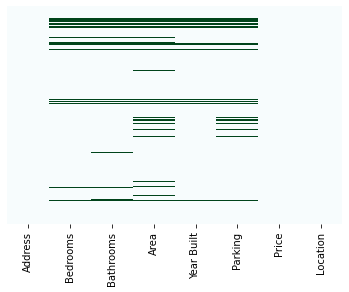

In [8]:
# Check the missing values
sns.heatmap(df_combined.isna(), yticklabels=False, cbar=False, cmap='BuGn')

In [9]:
df_combined = df_combined.dropna()

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7826 entries, 0 to 859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     7826 non-null   object
 1   Bedrooms    7826 non-null   object
 2   Bathrooms   7826 non-null   object
 3   Area        7826 non-null   object
 4   Year Built  7826 non-null   object
 5   Parking     7826 non-null   object
 6   Price       7826 non-null   object
 7   Location    7826 non-null   object
dtypes: object(8)
memory usage: 550.3+ KB


<AxesSubplot:>

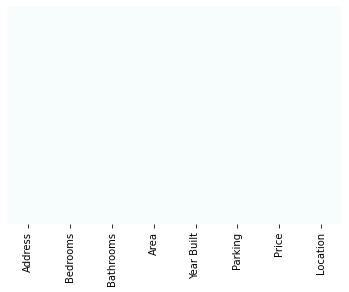

In [11]:
# Check the missing values
sns.heatmap(df_combined.isna(), yticklabels=False, cbar=False, cmap='BuGn')

### Reset/Change Index

In [12]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
853,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
854,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
857,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
858,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


In [13]:
df_combined = df_combined.reset_index(drop=True)
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
7821,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
7822,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
7823,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
7824,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


### Check for Outliers and Doubles

In [14]:
# check for duplicate
df_combined.duplicated().sum()

1580

In [15]:
df_combined.loc[df_combined.duplicated(), :]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
80,1829 Illinois St NE,5 Beds,2 Baths,"1,797 sqft",1954,1 Car Garage,"$225,000",Albuquerque
81,9109 Crestwood Ave NE,3 Beds,3 Baths,"2,183 sqft",1963,2 Car Garage,"$320,000",Albuquerque
82,3401 Cagua Dr NE,3 Beds,2 Baths,"1,831 sqft",1955,2 Carport Spaces,"$269,000",Albuquerque
83,1325 Hertz Dr SE,3 Beds,3 Baths,"3,335 sqft",1975,2 Car Garage,"$435,000",Albuquerque
84,1020 Indiana St SE,4 Beds,2 Baths,"1,950 sqft",1953,Garage,"$299,900",Albuquerque
...,...,...,...,...,...,...,...,...
7748,525 Water St SW #420,3 Beds,3 Baths,"1,724 sqft",2016,2 Car Garage,"$1,375,000",Washington
7749,1032 Lamont St NW #A,3 Beds,3 Baths,"1,464 sqft",1907,Open Parking,"$749,000",Washington
7750,2403 Savannah St SE,3 Beds,2 Baths,"1,405 sqft",1950,1 Open Spaces,"$449,900",Washington
7751,7508 Eastern Ave NW,3 Beds,3 Baths,"1,088 sqft",1948,Open Parking,"$599,000",Washington


In [16]:
df_combined = df_combined.drop_duplicates()
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
7821,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
7822,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
7823,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
7824,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


In [17]:
df_combined = df_combined.reset_index(drop=True)
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


### Change price column

In [18]:
# rename price column and update existing dataframe
df_combined = df_combined.rename(columns={'Price':'Price($)'})
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"$330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"$289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"$155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"$269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"$450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"$829,900",Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"$549,900",Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"$319,500",Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"$1,375,000",Washington


### Price data : cut '$' in price

In [19]:
df_combined['Price($)'] = df_combined['Price($)'].str.strip('$')
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,"330,000",Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,"289,900",Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,"155,000",Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,"269,900",Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,"450,000",Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,"829,900",Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,"549,900",Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,"319,500",Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,"1,375,000",Washington


### Price Data : Cut ',' in price

In [20]:
df_combined['Price($)'] = df_combined['Price($)'].str.replace(',','')
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,1375000,Washington


### Change area column

In [21]:
# rename price column and update existing dataframe
df_combined = df_combined.rename(columns={'Area':'Area(Sqft)'})
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000 sqft",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212 sqft",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815 sqft,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600 sqft",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445 sqft",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200 sqft",1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835 sqft,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743 sqft,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078 sqft",1985,2 Car Garage,1375000,Washington


### Area data : cut 'sqft' string element

In [22]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.strip(' sqft')
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,"2,000",1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,"2,212",2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,"1,600",1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,"2,445",1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,"1,200",1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,"2,078",1985,2 Car Garage,1375000,Washington


### Area data : cut ',' string element

In [23]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.replace(',', '')
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4 Beds,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4 Beds,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2 Beds,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3 Beds,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4 Beds,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3 Beds,4 Baths,1200,1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2 Beds,1 Bath,835,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1 Bed,1 Bath,743,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3 Beds,3 Baths,2078,1985,2 Car Garage,1375000,Washington


### Bedrooms data : cut 'beds' string element

In [24]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].str.strip('Beds')
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4 Baths,1200,1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2,1 Bath,835,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1,1 Bath,743,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3,3 Baths,2078,1985,2 Car Garage,1375000,Washington


In [25]:
df_combined['Bedrooms'].value_counts() 

3         2122
2         1376
4         1312
5          525
1          473
6          214
Studio      80
7           75
8           37
9           17
11           5
10           3
12           3
13           1
84           1
14           1
24           1
Name: Bedrooms, dtype: int64

### Bedrooms data : "Studio" = 1 room

In [26]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].apply(lambda x: 1 if 'Studio' in x else x)
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3 Baths,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3 Baths,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1 Bath,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2 Baths,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3 Baths,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4 Baths,1200,1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2,1 Bath,835,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1,1 Bath,743,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3,3 Baths,2078,1985,2 Car Garage,1375000,Washington


### Bathrooms data : cut 'baths' string element

In [27]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].str.strip(' Baths')
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,2 Car Garage,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,2 Car Garage,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,No Info,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,2 Car Garage,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,2 Car Garage,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,Open Parking,829900,Washington
6242,1111 25th St NW #304,2,1,835,2005,1 Car Garage,549900,Washington
6243,922 24th St NW #5B,1,1,743,1962,1 Car Garage,319500,Washington
6244,1099 22nd St NW #401,3,3,2078,1985,2 Car Garage,1375000,Washington


### Parking data : yes/no

In [28]:
df_combined['Parking'].value_counts()

Garage               1623
No Info              1136
2 Car Garage         1020
Open Parking          805
1 Car Garage          487
3 Car Garage          333
Attached Garage       158
None                  142
1 Parking Spaces      134
4 Car Garage           80
1 Carport Spaces       69
1 Open Spaces          39
2 Open Spaces          37
2 Parking Spaces       35
2 Carport Spaces       28
Carport                23
0 Open Spaces          17
6 Car Garage           14
5 Car Garage           11
4 Parking Spaces        8
3 Open Spaces           6
4 Open Spaces           5
5 Open Spaces           5
8 Car Garage            4
3 Parking Spaces        4
3 Carport Spaces        3
8 Parking Spaces        3
9 Car Garage            2
6 Parking Spaces        2
0 Carport Spaces        1
5 Carport Spaces        1
7 Car Garage            1
4 Carport Spaces        1
11 Car Garage           1
10 Car Garage           1
3.5 Car Garage          1
20 Car Garage           1
5 Parking Spaces        1
9 Parking Sp

In [29]:
df_combined['Parking'] = df_combined['Parking'].apply(lambda x: 'yes' if 'Garage' in x or 'Carport' in x or 'Car' in x or 'Open' in x else 'no')

In [30]:
df_combined['Parking'].value_counts()

yes    4780
no     1466
Name: Parking, dtype: int64

In [31]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6242,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6243,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington
6244,1099 22nd St NW #401,3,3,2078,1985,yes,1375000,Washington


### Convert all numbers to integers

Bedrooms

In [34]:
# check if "bedrooms column" is a numeric element
is_numeric_dtype(df_combined['Bedrooms'])

False

In [35]:
is_string_dtype(df_combined['Bedrooms'])

True

In [36]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].astype(int)

In [37]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246 entries, 0 to 6245
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     6246 non-null   object
 1   Bedrooms    6246 non-null   int32 
 2   Bathrooms   6246 non-null   object
 3   Area(Sqft)  6246 non-null   object
 4   Year Built  6246 non-null   object
 5   Parking     6246 non-null   object
 6   Price($)    6246 non-null   object
 7   Location    6246 non-null   object
dtypes: int32(1), object(7)
memory usage: 366.1+ KB


Bathrooms

In [38]:
# check if "bathrooms column" is a numeric element
is_numeric_dtype(df_combined['Bathrooms'])

False

In [39]:
# check if "bedrooms column" is a string element
is_string_dtype(df_combined['Bathrooms'])

True

In [40]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].astype(int)

Area(Sqft)

In [60]:
# check if "area" is a numeric element
is_numeric_dtype(df_combined['Area(Sqft)'])

True

In [43]:
# check if "bedrooms column" is a string element
is_string_dtype(df_combined['Area(Sqft)'])

True

In [44]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].astype(int) 

Year Built

In [56]:
# 1) check if numeric
# 10) 
is_numeric_dtype(df_combined['Year Built'])

True

In [55]:
# change to numeric
# 9)
df_combined['Year Built'] = df_combined['Year Built'].astype(int)

In [57]:
# 3) show "no info"
df_combined[df_combined['Year Built'] == 'No Info']

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location


In [54]:
# 4) replace "no info" with 0
# 8)
df_combined['Year Built'] = df_combined['Year Built'].apply(lambda x: 0 if 'No Info' in x else x)

In [50]:
# 5) save in str
df_combined['Year Built'] = df_combined['Year Built'].astype(str)

In [53]:
# 6) unique values
df_combined['Year Built'].value_counts()

2021    481
1900    210
1920    191
1925    184
2006    157
       ... 
1809      1
1752      1
1876      1
1834      1
1874      1
Name: Year Built, Length: 157, dtype: int64

In [58]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6242,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6243,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington
6244,1099 22nd St NW #401,3,3,2078,1985,yes,1375000,Washington


price in $

In [64]:
is_numeric_dtype(df_combined['Price($)'])

True

In [63]:
df_combined['Price($)'] = df_combined['Price($)'].astype(int)

In [62]:
df_combined['Price($)'] = df_combined['Price($)'].apply(lambda x: x.replace('+', '') if '+' in x else x)

In [65]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque
...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington
6242,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington
6243,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington
6244,1099 22nd St NW #401,3,3,2078,1985,yes,1375000,Washington


### New Column 'price/sqft'

In [66]:
df_combined['price/sqft'] = df_combined['Price($)']/df_combined['Area(Sqft)']

In [67]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,price/sqft
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque,165.000000
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque,131.057866
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque,190.184049
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque,168.687500
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque,184.049080
...,...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington,691.583333
6242,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington,658.562874
6243,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington,430.013459
6244,1099 22nd St NW #401,3,3,2078,1985,yes,1375000,Washington,661.693936


In [68]:
df_combined['price/sqft'] = df_combined['price/sqft'].round(2)

In [69]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,price/sqft
0,9400 La Playa St NE,4,3,2000,1975,yes,330000,Albuquerque,165.00
1,460 Wesley Ct SW,4,3,2212,2003,yes,289900,Albuquerque,131.06
2,1307 Bernardino Rd NW,2,1,815,1948,no,155000,Albuquerque,190.18
3,5215 Cimarron Rd NW,3,2,1600,1977,yes,269900,Albuquerque,168.69
4,2804 Charleston St NE,4,3,2445,1963,yes,450000,Albuquerque,184.05
...,...,...,...,...,...,...,...,...,...
6241,2232 Mount View Pl SE,3,4,1200,1933,yes,829900,Washington,691.58
6242,1111 25th St NW #304,2,1,835,2005,yes,549900,Washington,658.56
6243,922 24th St NW #5B,1,1,743,1962,yes,319500,Washington,430.01
6244,1099 22nd St NW #401,3,3,2078,1985,yes,1375000,Washington,661.69


### Check for outliers

In [71]:
df_combined['price/sqft'].describe()

count      6246.000000
mean        616.918277
std        7205.666641
min           0.440000
25%         189.710000
50%         311.160000
75%         596.375000
max      560000.000000
Name: price/sqft, dtype: float64

In [72]:
df_combined.loc[df_combined['price/sqft'] == 560000]

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Built,Parking,Price($),Location,price/sqft
3564,3069 Heath Ave,3,2,1,1899,no,560000,New York,560000.0


In [73]:
df_combined = df_combined.drop(3564)

### Save in Excel

In [ ]:
df_combined.to_excel('cleaned_data.xlsx', index=False)